In [5]:
import os
import re
import random
import matplotlib as mpl
import matplotlib.pyplot as plt

from bs4 import BeautifulSoup

In [7]:
sampling = 1
doc_folder = "data/crawl-dmoz-fr-100000-html/docs"

files = [file for file in os.listdir(doc_folder) if bool(re.match(r'part-[0-9]+', file))]
html_list = []

for file in files:
    filepath = os.path.join(doc_folder, file)
    print(filepath)
    file = open(filepath, 'r', encoding='utf-8')
    html_list += re.findall(r'<html[^>]*>.*?<\/html>', file.read(), re.DOTALL)
    break

print(len(html_list))

data/crawl-dmoz-fr-100000-html/docs/part-00068
944


In [4]:
string = "<html>test</html><html>hello</html>   <html>yo</html>"
re.findall(r'<html.*?>(.+?)</html>', string)

['test', 'hello', 'yo']

In [8]:
html_list[0]

'<html class="page_article ltr fr no-js ie ie6 lte9 lte8 lte7" xmlns="http://www.w3.org/1999/xhtml" xml:lang="fr" lang="fr" dir="ltr"> <![endif]-->\n<!--[if IE 7 ]>    <html class="page_article ltr fr no-js ie ie7 lte9 lte8 lte7" xmlns="http://www.w3.org/1999/xhtml" xml:lang="fr" lang="fr" dir="ltr"> <![endif]-->\n<!--[if IE 8 ]>    <html class="page_article ltr fr no-js ie ie8 lte9 lte8" xmlns="http://www.w3.org/1999/xhtml" xml:lang="fr" lang="fr" dir="ltr"> <![endif]-->\n<!--[if IE 9 ]>    <html class="page_article ltr fr no-js ie ie9 lte9" xmlns="http://www.w3.org/1999/xhtml" xml:lang="fr" lang="fr" dir="ltr"> <![endif]-->\n<!--[if (gt IE 9)|!(IE)]><!-->\n<html class="page_article ltr fr no-js" xmlns="http://www.w3.org/1999/xhtml" xml:lang="fr" lang="fr" dir="ltr">\n<!--<![endif]-->\n\t\n\t<head>\n\t\n\n\t\n\t\n\t<title>Services politiques et administratifs - France-Allemagne.fr</title>\n<meta name="description" content="Minist&#232;res des Affaires &#233;trang&#232;res et ambassade

In [36]:
dic = {}

for html in html_list:
    test = re.findall(r'<[^!\</\-\?][^>/\n:]*>', html, re.DOTALL)
    for balise in test:
        if " " in balise:
            balise = balise.split(" ")[0] + ">"

        if not balise in dic:
            dic[balise] = 1
        else:
            dic[balise] += 1

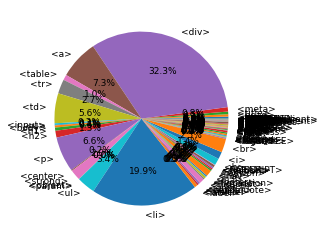

In [57]:
mpl.rcParams['font.size'] = 9.0

#plt.figure(figsize=(30,20))
plt.pie(dic.values(), labels=dic.keys(), autopct='%1.1f%%')
plt.savefig('pie.png')
plt.show()

In [18]:
soup = BeautifulSoup(html_list[2])

In [28]:
soup = BeautifulSoup(html_list[3])
print(soup.prettify())

<html xmlns="http://www.w3.org/1999/xhtml">
 <head>
  <link href="favicon.png" rel="icon" type="image/png"/>
  <!-- Copyright 2005 Macromedia, Inc. All rights reserved. -->
  <title>
   Statues - Atelier françois Bronze: restaurations, bronze ,cuivre,etain,régules,fonte,argent,scheffield.
  </title>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <link href="bronze.css" rel="stylesheet" type="text/css"/>
 </head>
 <body background="mm_bg_red.gif" bgcolor="#990000">
  <div align="center">
   <div id="header">
    <div class="leftbg">
    </div>
    <div class="head-content">
     Atelier Francois Bronze
  Restauration d'Objets d'Art
  Bronze, Cuivre, Etain, Laiton, Zinc, Régule, Fonte, Argent, Scheffield
    </div>
    <div class="rightbg">
    </div>
   </div>
   <table border="0" cellpadding="0" cellspacing="0" width="1010">
    <tr bgcolor="#FF9900">
     <td colspan="4">
      <img alt="" border="0" height="1" src="spacer.gif" width="1"/>
     </td>
    </tr

In [20]:
from langdetect import detect

test = '<html><body><div><header class="article__header  ">     <div class="article__heading"> <h1 class="article__title">La Cour de cassation rejette le pourvoi de Marine Le Pen, caricaturée en étron fumant</h1>  <p class="article__desc">    La plus haute juridiction française a estimé que « la publication litigieuse ne dépassait pas les limites admissibles de la liberté d’expression », même si l’injure était « caractérisée ». </p>  </div> <p class="meta meta__publisher">  <span class="meta__author">Le Monde avec AFP</span>  <span class="meta__date">Publié le 25 octobre 2019 à 17h22 - Mis à jour le 25 octobre 2019 à 17h35</span> </p>  <p class="meta__reading-time"> <span class="icon__reading-time"/> <span class="sr-only">Temps de </span>Lecture 1 min. </p>       </header>      <section class="article__content  old__article-content-single">         <figure> <picture class="article__media"> <source srcset="https://img.lemde.fr/2019/10/07/0/0/2833/1760/688/0/60/0/1bb83e4_BTE101_FRANCE-IMMIGRATION-_1007_11.JPG" media="(min-width: 992px)"> <source srcset="https://img.lemde.fr/2019/10/07/0/0/2833/1760/688/0/60/0/1bb83e4_BTE101_FRANCE-IMMIGRATION-_1007_11.JPG" media="(min-width: 576px)"> <img src="https://img.lemde.fr/2019/10/07/0/0/2833/1760/688/0/60/0/1bb83e4_BTE101_FRANCE-IMMIGRATION-_1007_11.JPG" alt="La présidente du Rassemblement national, le 7 octobre dernier."/> <noscript> <img src="https://img.lemde.fr/2019/10/07/0/0/2833/1760/688/0/60/0/1bb83e4_BTE101_FRANCE-IMMIGRATION-_1007_11.JPG"/> </noscript> </source></source></picture>  <figcaption class="article__legend" aria-hidden="“true“">La présidente du Rassemblement national, le 7 octobre dernier. BENOIT TESSIER / REUTERS</figcaption>  </figure>           <p class="article__paragraph ">L’affaire de Marine Le Pen caricaturée en étron fumant est close après sept ans de combat judiciaire. Vendredi 25 octobre, la Cour de cassation <a href="https://www.courdecassation.fr/jurisprudence_2/assemblee_pleniere_22/649_25_43808.html">a rejeté un pourvoi de Marine Le Pen</a> en jugeant que <em>« la publication litigieuse ne dépassait pas les limites admissibles de la liberté d’expression »</em>, même si l’injure était <em>« caractérisée »</em>. La plus haute juridiction judiciaire française s’était réunie le 11 octobre en assemblée plénière, sa formation la plus solennelle, pour trancher cette question qui, sous des airs cocasses, renferme un débat de droit tout à fait sérieux.</p>          <p class="article__paragraph ">La caricature avait été publiée en janvier 2012 dans le journal satirique <em>Charlie Hebdo</em>. Y figurait un étron fumant sur fond tricolore, sous le slogan <em>« Le Pen, la candidate qui vous ressemble »</em>. Quelques jours plus tard, Laurent Ruquier l’avait montrée dans son émission « On n’est pas couché », sur France 2. Marine Le Pen n’avait pas attaqué <em>Charlie Hebdo</em>, mais avait poursuivi Laurent Ruquier, en raison de son public bien plus large.</p>      <p id="inread-2" class="dfp-slot dfp__slot dfp__inread dfp-unloaded" data-format="inread" aria-hidden="true"/>      <p class="article__paragraph ">La justice avait débouté la présidente du FN en 2014 puis 2015, avant que la Cour de cassation, en 2016, ne juge que les limites de la liberté d’expression avaient été dépassées et ordonne un troisième procès. En 2017, la cour d’appel l’avait de nouveau déboutée.</p>          <h2 class="article__sub-title">Les magistrats ont écarté la « dignité de la personne humaine »</h2>          <p class="article__paragraph ">Dans leur arrêt publié vendredi, les hauts magistrats mettent en avant le contexte : la caricature a été montrée par Laurent Ruquier <em>« avec d’autres affiches parodiant chacun des candidats à l’élection présidentielle, dans la séquence d’une émission polémique s’apparentant à une revue de presse, mention étant expressément faite que ces affiches émanent d’un journal satirique et présentent elles-mêmes un caractère polémique »</em>.</p>          <p class="article__paragraph ">La Cour de cassation a recherché le <em>« juste équilibre »</em> entre le droit au respect de la vie privée et le droit à la liberté d’expression. Les hauts magistrats ont écarté la notion de la <em>« dignité de la personne humaine »,</em> pourtant avancée par la Cour de cassation quand elle avait eu à trancher en 2016. Dans cette affaire, la dignité ne peut être érigée en limite à la liberté d’expression : elle <em>« ne saurait être érigée en fondement autonome des restrictions à la liberté d’expression »</em>, écrivent-ils dans leur arrêt.</p>          <p class="article__paragraph "><em>« Nous sommes ravis »</em> de cette décision, a réagi l’avocat de Laurent Ruquier, Jean Ennochi. Cette procédure a démarré il y a sept ans. <em>« En l’état, l’affaire est close »</em>, s’est félicité l’avocat.</p>                                  </section>            </div></body></html>'

lang = detect(test)
print(lang)

fr


In [11]:
from time import sleep
from datetime import datetime

while True:
    now = datetime.now()
    date_time = now.strftime("%H:%M:%S")
    print(date_time, end='\r')	
    sleep(1)

KeyboardInterrupt: 